In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:/Users/CVR/Downloads/GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


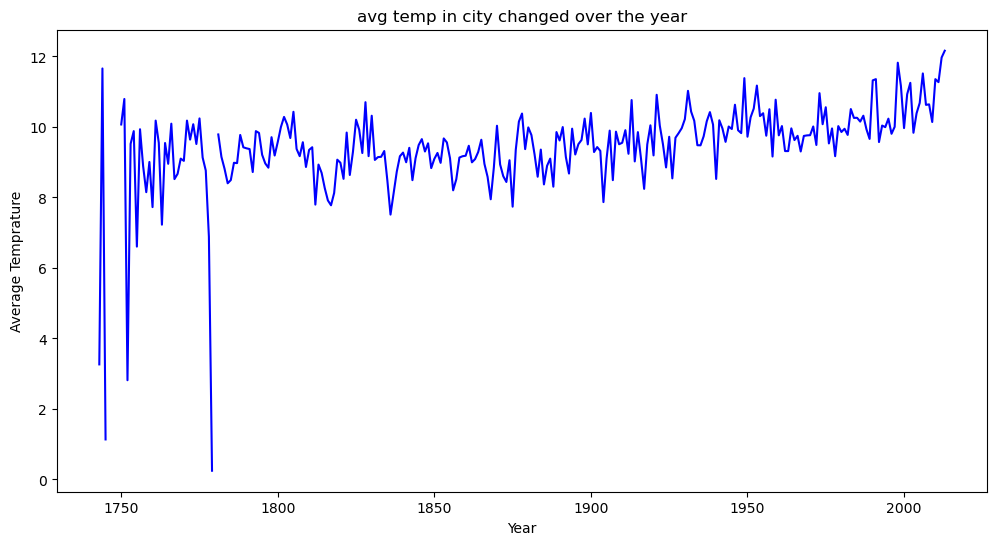

In [10]:
    city_data=data[data["City"]=="New York"].copy()
    city_data["dt"]=pd.to_datetime(city_data["dt"], errors="coerce")
    city_data["year"]=city_data["dt"].dt.year
    annual_avg_temp=city_data.groupby("year")["AverageTemperature"].mean().reset_index()
    plt.figure(figsize=(12,6))

    plt.plot(annual_avg_temp["year"],annual_avg_temp["AverageTemperature"],linestyle="-", color="blue")
    plt.title("avg temp in city changed over the year")
    plt.xlabel("Year")
    plt.ylabel("Average Temprature")
    plt.show()

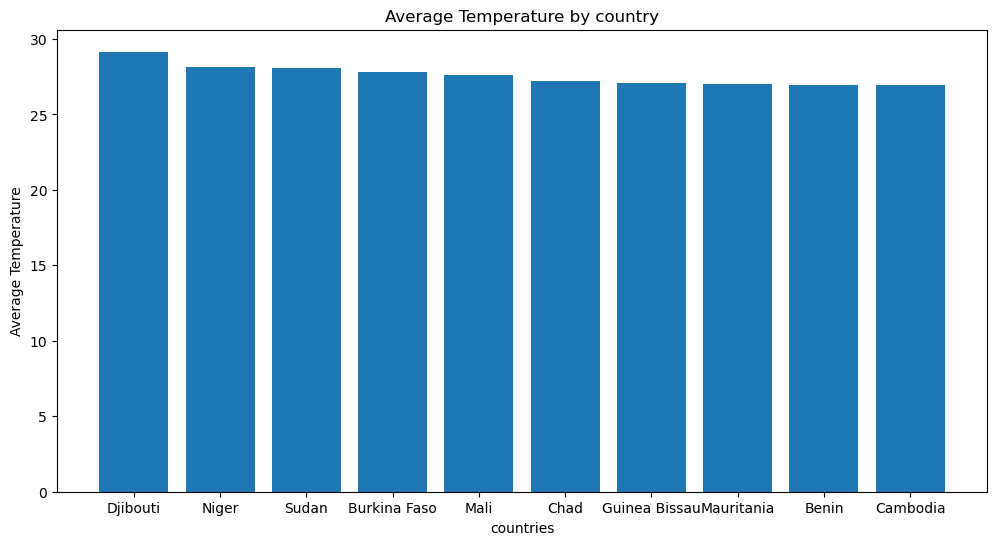

In [19]:
country_avg_temp=data.groupby("Country")["AverageTemperature"].mean().reset_index()
country_avg_temp=country_avg_temp.dropna()
top_countries=country_avg_temp.sort_values(by="AverageTemperature",ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_countries["Country"],top_countries["AverageTemperature"])
plt.title("Average Temperature by country")
plt.xlabel("countries")
plt.ylabel("Average Temperature")
plt.show()

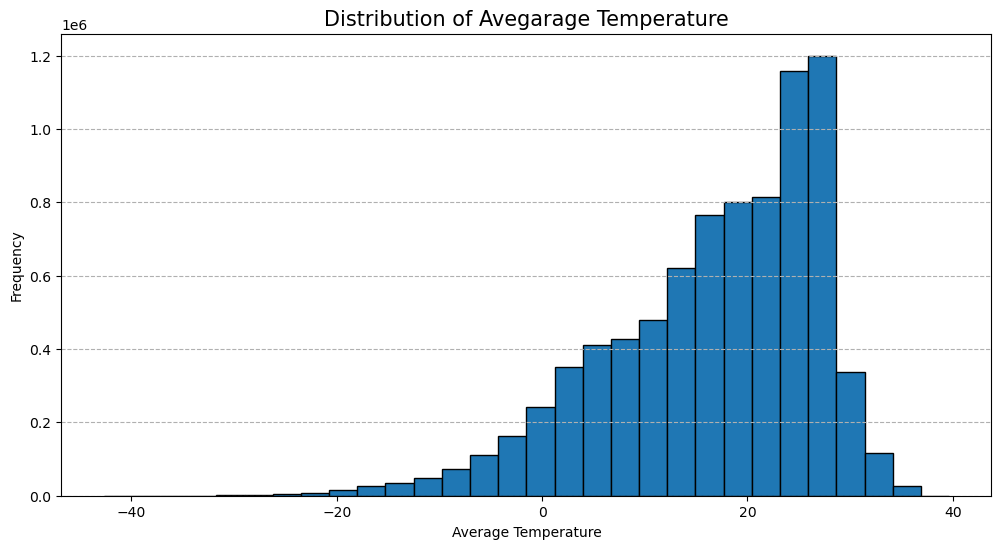

In [37]:
temp_data=data["AverageTemperature"].dropna()
plt.figure(figsize=(12,6))
plt.hist(temp_data,bins=30,edgecolor="black")
plt.title("Distribution of Avegarage Temperature",fontsize=15)
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.grid(axis='y',linestyle="--",alpha=1)
plt.show()

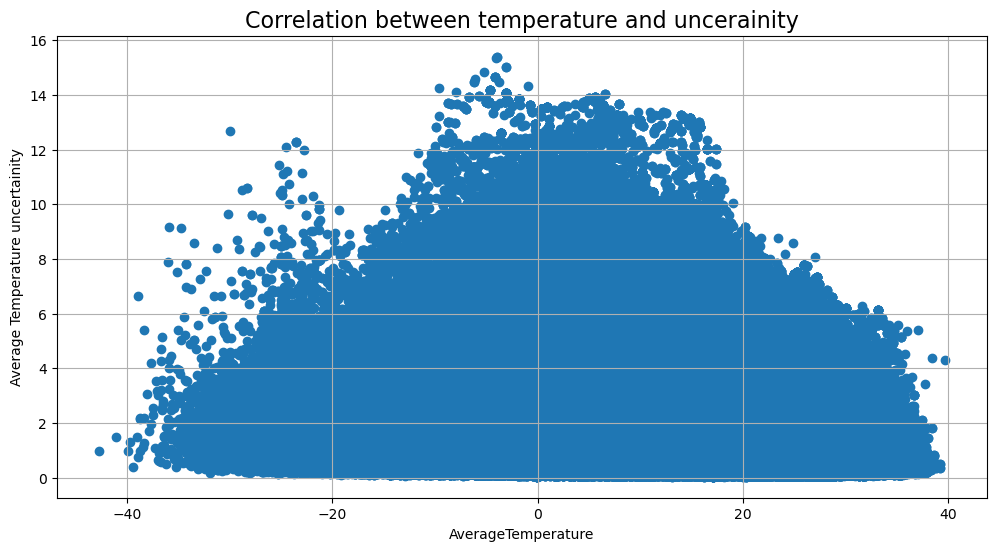

In [41]:
avg_temp=data["AverageTemperature"].dropna()
temp_uncertainity=data["AverageTemperatureUncertainty"].dropna()
plt.figure(figsize=(12,6))
plt.scatter(avg_temp,temp_uncertainity)
plt.title("Correlation between temperature and uncerainity",fontsize=16)
plt.xlabel("AverageTemperature")
plt.ylabel("Average Temperature uncertainity")
plt.grid(True)
plt.show()

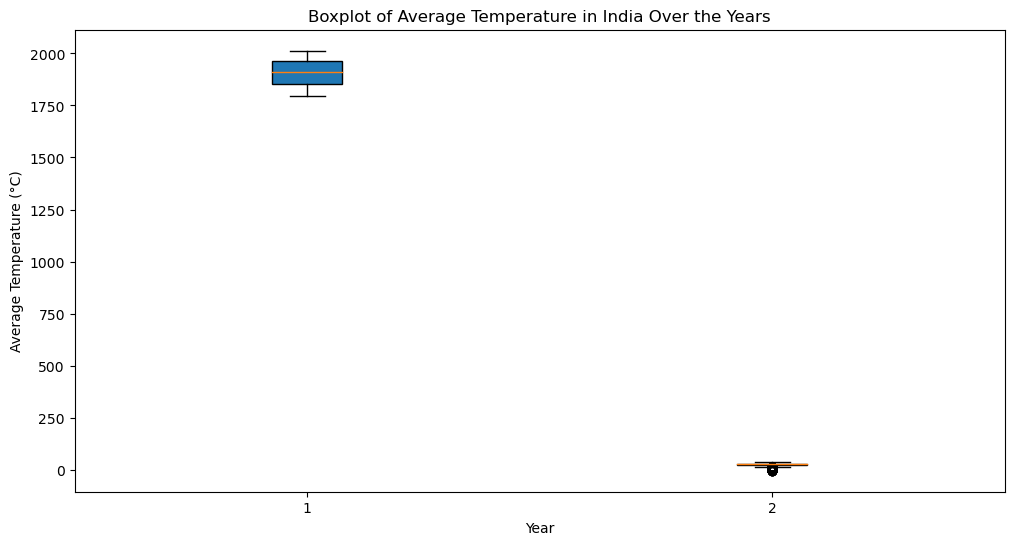

In [45]:

fd=data[data["Country"]=="India"].copy()
fd["dt"]=pd.to_datetime(fd["dt"], errors="coerce")
fd=fd.dropna(subset=["dt"])
fd["year"]=fd["dt"].dt.year
fd=fd[["year","AverageTemperature"]].dropna()
grp_data=[group["AverageTemperature"]for _,group in fd.groupby("year")]
plt.figure(figsize=(12, 6))
plt.boxplot(fd,showfliers=True,patch_artist=True)

plt.title("Boxplot of Average Temperature in India Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")

plt.show()



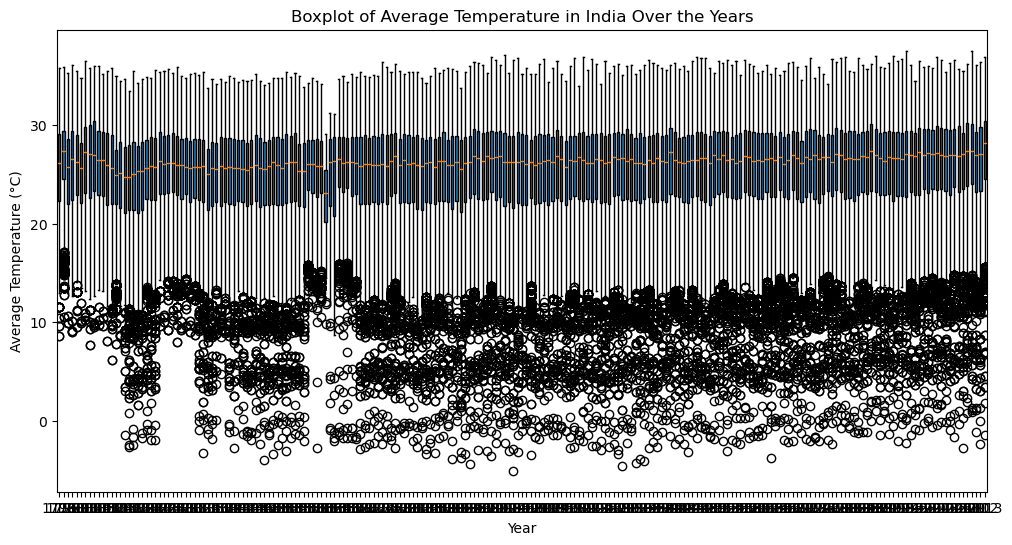

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame
# Filter data for India
fd = data[data["Country"] == "India"].copy()

# Convert 'dt' to datetime
fd["dt"] = pd.to_datetime(fd["dt"], errors="coerce")

# Drop rows with NaT (missing dates)
fd = fd.dropna(subset=["dt"])

# Extract year from the 'dt' column
fd["year"] = fd["dt"].dt.year

# Select relevant columns and drop NaN values from 'AverageTemperature'
fd = fd[["year", "AverageTemperature"]].dropna()

# Group by year and collect data for each group (list of AverageTemperatures per year)
grp_data = [group["AverageTemperature"].values for _, group in fd.groupby("year")]

# Plot a boxplot for AverageTemperature per year
plt.figure(figsize=(12, 6))
plt.boxplot(grp_data, showfliers=True, patch_artist=True)

# Add titles and labels
plt.title("Boxplot of Average Temperature in India Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")

# Add x-tick labels (Years)
plt.xticks(range(1, len(grp_data) + 1), [str(year) for year in sorted(fd["year"].unique())])

# Display the plot
plt.show()
